In [22]:
from torchvision.io import read_image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [23]:
transactions = pd.read_csv('../data/transactions_cleaned.csv')

In [24]:
transactions.shape

(31651678, 6)

In [25]:
transactions.head()

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id
0,0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [26]:
article_counts = transactions.value_counts(subset='article_id')

In [27]:
article_counts.describe()

count    104106.000000
mean        304.033178
std         783.491375
min           1.000000
25%          14.000000
50%          65.000000
75%         287.000000
max       50287.000000
dtype: float64

- So we have 100,000+ items with:
    - The mean number of units sold is 304 while the median number of units sold is 65. This indicates that the distribution of units sold is right-skewed (i.e. there are a few items which sell really well).
    - The standard deviation is 783. Since the mean and median are so disparate, the high standard deviation is most likely a result of the right-skewness.
    - the IQR is approximately 270, which again indicates wide spread.
    - The greatest number of units sold for an item was 50287 units.

Let's take a look at the top 10 best selling items in the data set.

In [28]:
top10 = transactions.value_counts(subset='article_id')[0:20]

top10

article_id
706016001    50287
706016002    35043
372860001    31718
759871002    26329
464297007    25025
372860002    24458
399223001    22236
706016003    21241
720125001    21063
156231001    21013
562245046    20719
562245001    20464
351484002    20415
399256001    20242
673396002    19834
568601006    19379
448509014    19216
673677002    19143
751471001    18263
608776002    17886
dtype: int64

In [29]:
def get_image(prod_code):
    prod_string = '0'+str(prod_code)
    path = '../images/'+prod_string[0:3]
    
    return mpimg.imread(path+'/'+prod_string+'.jpg')
    

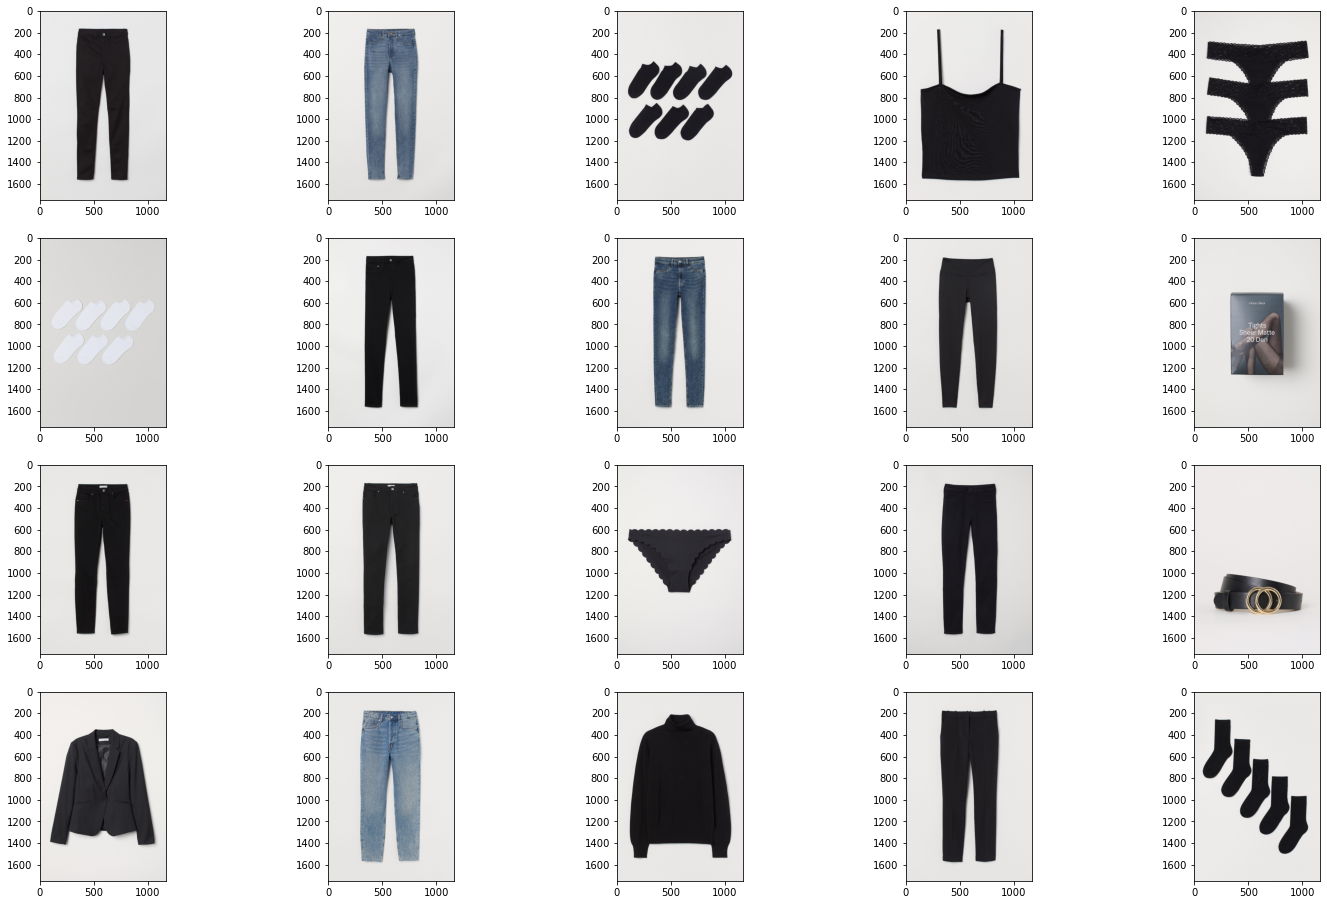

In [30]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=5

for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img = get_image(top10.index[i])
    imgplot = plt.imshow(img)

plt.savefig('../assets/top20-all-time.png')

Next, let's take a look at the customers themselves.

In [32]:
cust_counts = transactions.groupby('customer_id')['t_dat'].count()

In [33]:
cust_counts.sort_values(ascending=False)[0:20]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1893
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1361
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1360
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1236
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1197
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1164
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1162
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1153
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1140
e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb    1113
3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f3a908fac9b983692f2    1109
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54    1096
e6498c7514c61d3c24669f49753dc83fdff3ec1

- The customer who bought the most items was customer ```be198....``` who bought 1893 items (quite a lot!)
- 2nd place goes to customer ```b4db5...``` who bought 1441 (also quite a lot!)

Let's look at what these two customers liked buying the most.

In [35]:
top_customer = transactions[ transactions['customer_id'] == 'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b' ]

In [36]:
top_customer.value_counts('article_id')[0:20]

article_id
253448001    8
668956001    7
826500008    7
706016029    6
828934001    6
827411001    6
704126005    6
777099001    6
787696001    5
796685001    4
811925009    4
823168002    4
806807001    4
863665002    4
829052001    4
823317003    4
684209004    4
889379003    4
821674001    4
568751005    4
dtype: int64

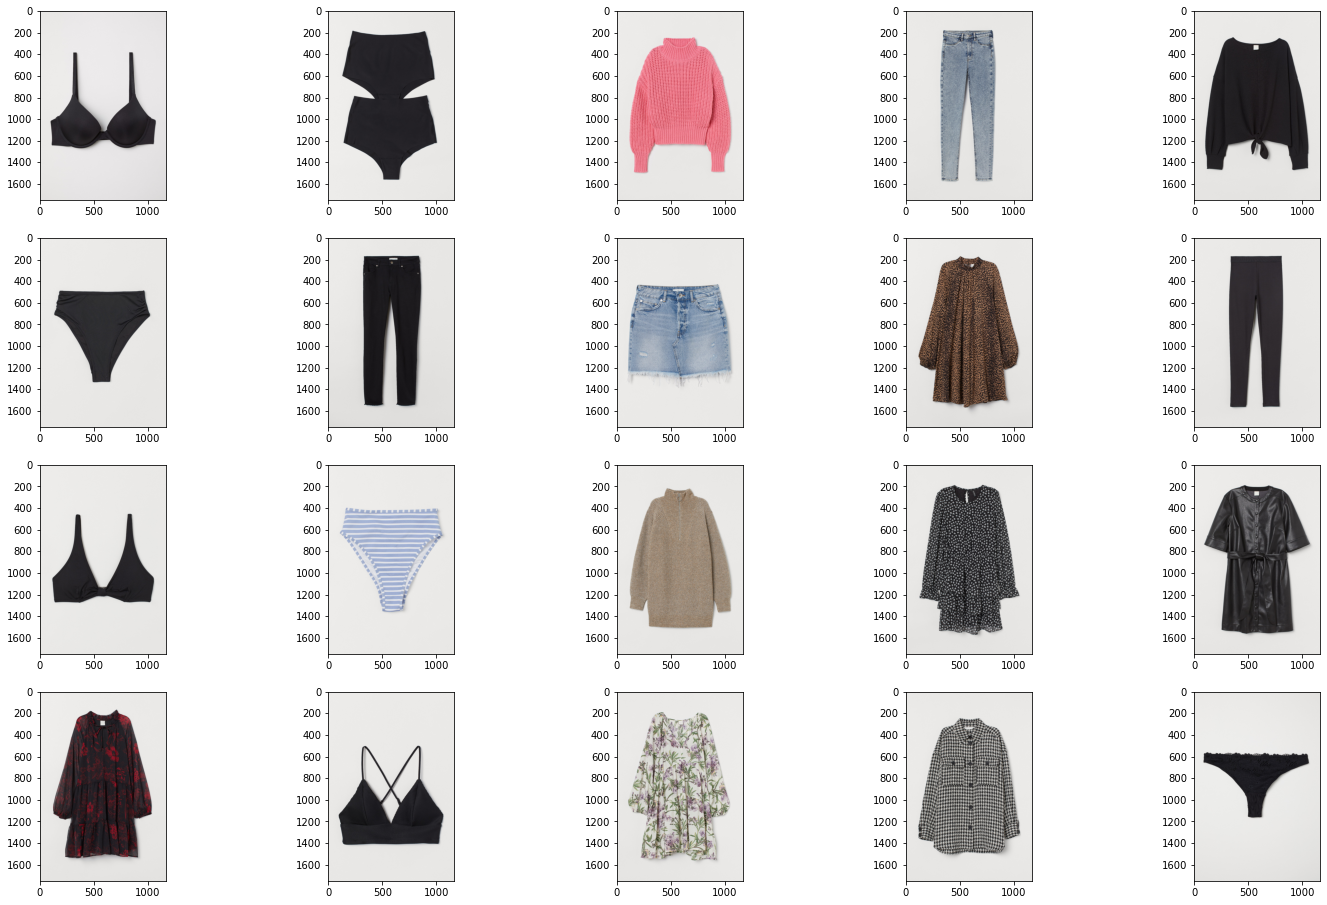

In [40]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=5

for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img = get_image(top_customer.value_counts('article_id')[0:20].index[i])
    imgplot = plt.imshow(img)


In [41]:
second_customer = transactions[ transactions['customer_id'] == 'b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71' ]

second_customer.value_counts('article_id')[0:20]

article_id
554640012    6
733267002    6
685448004    5
787307001    5
750777003    5
793025004    5
717885001    5
809411001    4
875239004    4
731425001    4
733268001    4
874879001    4
750960001    4
642380001    4
791152003    4
764084009    4
693242005    4
669713004    3
865503001    3
860657001    3
dtype: int64

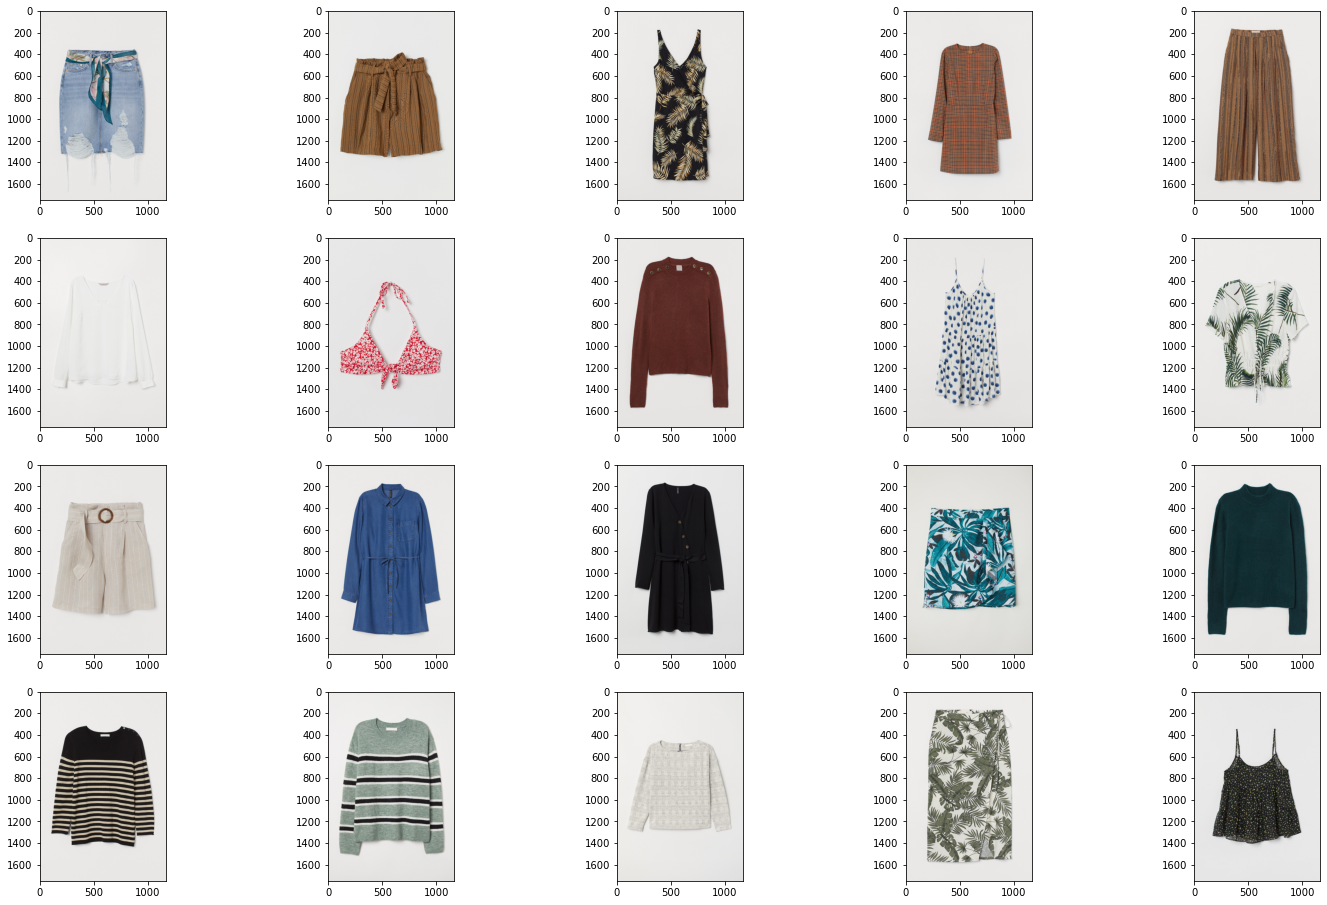

In [42]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=5

for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img = get_image(second_customer.value_counts('article_id')[0:20].index[i])
    imgplot = plt.imshow(img)
